# Motivation

I am making this notebook to help EPIB 463 students understand [this](https://projects.datacamp.com/projects/479) Datacamp project which is based on [this GitHub Repository](https://github.com/mbonsma/lefty-longevity).

# Source Data

In the same directory as this notebook there are two files. 
 - `mortality_rates_1999.csv`: Mortality counts by age and gender from the CDC in 1999.
 - `lefthanded_rates_1986.csv`: Rates of lefthandedness by gender in 1986.
 
You can read more about these datasets by accessing the associated DataCamp project or GitHub Repository.

## Mortality Rates, 1999

### Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

PUBLICATION_YEAR = 1999

deaths_df = pd.read_csv('mortality_counts_1999.csv', index_col=0) # file has missing values, for old males mostly
deaths_df

,Both Sexes,Male,Female
Age,,,
0,27937.0,15646.0,12291.0
1,1989.0,1103.0,886.0
2,1376.0,797.0,579.0
3,1046.0,601.0,445.0
4,838.0,474.0,364.0
...,...,...,...
115,3.0,NaN,3.0
117,3.0,2.0,1.0
118,1.0,NaN,1.0


### Process Data

#### Fill in `NaN` values and change `dtype`

In [2]:
deaths_df = deaths_df.fillna(0).astype(int) # replace NaN's with 0's, change dtypes to int
deaths_df

,Both Sexes,Male,Female
Age,,,
0,27937,15646,12291
1,1989,1103,886
2,1376,797,579
3,1046,601,445
4,838,474,364
...,...,...,...
115,3,0,3
117,3,2,1
118,1,0,1


#### Add Birth Year

In [3]:
# Add column indicating birth year
deaths_df['birth_year'] = PUBLICATION_YEAR - deaths_df.index
deaths_df

,Both Sexes,Male,Female,birth_year
Age,,,,
0,27937,15646,12291,1999
1,1989,1103,886,1998
2,1376,797,579,1997
3,1046,601,445,1996
4,838,474,364,1995
...,...,...,...,...
115,3,0,3,1884
117,3,2,1,1882
118,1,0,1,1881


#### Add proportion of total population

In [4]:
deaths_df['sample_proportion'] = deaths_df['Both Sexes']/deaths_df['Both Sexes'].sum()
deaths_df

,Both Sexes,Male,Female,birth_year,sample_proportion
Age,,,,,
0,27937,15646,12291,1999,1.168402e-02
1,1989,1103,886,1998,8.318546e-04
2,1376,797,579,1997,5.754811e-04
3,1046,601,445,1996,4.374660e-04
4,838,474,364,1995,3.504747e-04
...,...,...,...,...,...
115,3,0,3,1884,1.254683e-06
117,3,2,1,1882,1.254683e-06
118,1,0,1,1881,4.182275e-07


### Graph Data

#### Bonus: Age Of Death Histogram Grouped By Gender, conditioned on dying in 1999

No surprises here. Women outlive men and here is the distribution showing that additional left skew for females. We will not be looking at this data grouped by gender after this plot.

(Yes, these are both skewed to the left.)

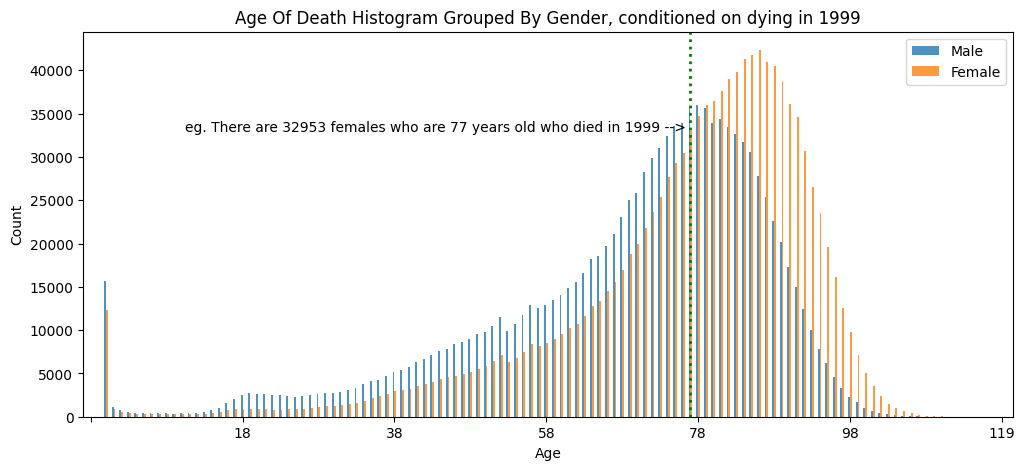

In [5]:
birth_year = 1922
age = 1999 - birth_year
count_females = deaths_df.at[age, 'Female']

# get AxesSubplot from dataframe `plot` object
ax = deaths_df[['Male', 'Female']].plot.bar(rot=0, alpha=.8, figsize=(12, 5))
ax.set_xticks(range(-2, 120, 20))
ax.axvline(age, 0, 50000, color='green', linestyle='dotted', linewidth=2)
annotation_text = f"eg. There are {count_females} females who are {age} years old who died in {PUBLICATION_YEAR} --> "
ax.text(age, count_females, annotation_text, horizontalalignment='right')
ax.set_xlim(-3, ax.get_xlim()[1])
ax.set_xlabel('Age')
ax.set_ylabel('Count')
_ = ax.set_title('Age Of Death Histogram Grouped By Gender, conditioned on dying in 1999')

#### Birth Year Death Distribution, year of death 1999

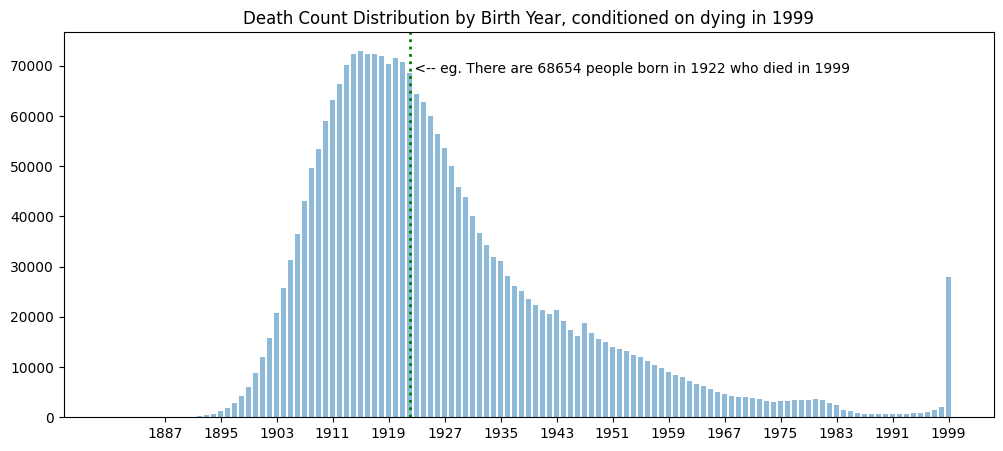

In [6]:
# Use implicit graphing in matplotlib
count = deaths_df.at[age, 'Both Sexes']

plt.figure(figsize=(12, 5))
plt.title('Death Count Distribution by Birth Year, conditioned on dying in 1999')
plt.bar(deaths_df['birth_year'], deaths_df['Both Sexes'], alpha=.5)
plt.xticks([deaths_df.birth_year[i] for i in range(0, len(deaths_df), 8)])
plt.axvline(birth_year, 0, 1, color='green', linestyle='dotted', linewidth=2)
annotation_text = f' <-- eg. There are {count} people born in {birth_year} who died in {PUBLICATION_YEAR}'
_ = plt.text(birth_year, count, annotation_text, rotation=0, horizontalalignment='left')

#### Age of Death Empirical Probability Distribution, conditioned on dying in 1999

This means that we will divide by the area under the curve. Since this is all discrete "count" data rather than continuous "binned" data, we can just sum up all the obesrvations and create a new graph. Do not expect a new shape, everything is just shorter by a factor equal to the total number of deaths.

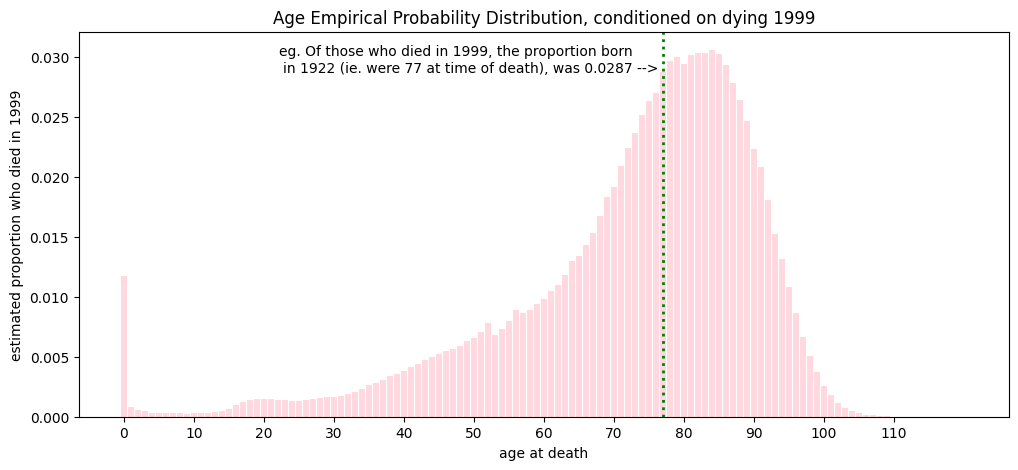

In [7]:
proportion = deaths_df.loc[age, 'sample_proportion']
# graph like before

plt.figure(figsize=(12, 5))
plt.title('Age Empirical Probability Distribution, conditioned on dying 1999')
plt.bar(deaths_df.index, deaths_df['sample_proportion'], color='pink', alpha=.6)
plt.ylabel('estimated proportion who died in 1999')
plt.xlabel('age at death')
plt.xticks([deaths_df.index[i] for i in range(0, len(deaths_df), 10)])
plt.axvline(age, 0, 1, color='green', linestyle='dotted', linewidth=2)
annotation_text = (f'eg. Of those who died in {PUBLICATION_YEAR}, the proportion born       \n'
                   f'in {birth_year} (ie. were {age} at time of death), was {proportion:.4f} --> ')
_ = plt.text(age, proportion, annotation_text, rotation=0, horizontalalignment='right')

### Interpretation

The estimated probability that someone randomly selected from the population of those in the US who died in 1999 were 77 at the age of death is .029.

This is sort of like the empirical probability distribution for dying at age A in 1999, otherwise known as **P(A)**.

### Observations

If you look closely on both graphs (being generated from the same dataset created in 1999), we have the following observations:
 - Conditioned on those who died in 1999, the bulk of them died after 60 years old.
 - There is a small and understandeable uptick in death in the first year of life, indicating, perhaps, that we may be more vulnurable. Not really the point of this, but you can see that, given that we are looking at the population of those who died in 1999, the probability of being born in 1999 and dying later that year is greater than the probability of being born at any other time in the 90s and dying in 1999. Perhaps from this, we can conclude that in general, once we make it past the first year, chances are we'll live until 60. Were babies born in 1999 somehow more vulnerable than other youth born prior to 1999 who also died in 1999?
 - Males and Females have similar life expectancies (in 1999), with a slight favoring of a longer lifespan toward females.

## Lefthanded Rates, 1986

Let's add a few columns to this dataset and observe the results

### Load Data

In [8]:
SURVEY_YEAR = 1986

lefthanded_df = pd.read_csv('lefthanded_rates_1986.csv', index_col=0) # load dataset
lefthanded_df

,Male,Female
Age,,
10,12.717558,12.198041
11,15.318830,11.144804
12,14.808281,11.549240
13,13.793744,11.276442
14,15.156304,11.572906
...,...,...
82,7.350204,4.874899
83,6.471204,5.672536
84,6.510858,5.774881


### Process Data

#### Estimate Total Lefthandedness Rate

In [9]:
lefthanded_df['lh_proportion'] = lefthanded_df.mean(axis=1)/100 # compute average rate 
lefthanded_df

,Male,Female,lh_proportion
Age,,,
10,12.717558,12.198041,0.124578
11,15.318830,11.144804,0.132318
12,14.808281,11.549240,0.131788
13,13.793744,11.276442,0.125351
14,15.156304,11.572906,0.133646
...,...,...,...
82,7.350204,4.874899,0.061126
83,6.471204,5.672536,0.060719
84,6.510858,5.774881,0.061429


**Note: Averages vs. Weighted Averages**

We will be OK with this simiplification of taking the average of two proportions to arrive at the total proportion because 1) it's not the point of the assignment, and women and men repreesent approximately equal parts of the population.


**Fallacy Notes**:

If you feel like taking the average is OK, you are incorrect, and I want you to take a minute to remember how important it is to weigh your observations:
 - Say you have 30 humans, and 10 of them eat 3 meals per day.
 - Let's also say you have 20 of them that eat 5 meals per day.
 - So we compute the average number of meals per day, and that's 4 (right?).
 - And we conclude that on average, students eat 4 meals per day.
 - _This reasoning is wrong_ because the real average would be to take the average of a list like this:
 - Sum up all the 3's
   - $3 + 3 + 3 + 3 + 3 + 3 + 3 + 3 + 3 + 3$ --> ten 3's
 - Then sum up all the 5
   - $5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5$ --> twenty 5's
 - This all sums up to $3\cdot10 + 5\cdot20 = 130$
 - So the average student would be $\frac{130}{30} = \frac{13}{3} = 4\frac{1}{3} = 4.\overline{3} \neq 4$

#### Drop 'Male' and 'Female' columns because they won't be needed

In [10]:
lefthanded_df = lefthanded_df.drop(['Male', 'Female'], axis=1)
lefthanded_df

,lh_proportion
Age,
10,0.124578
11,0.132318
12,0.131788
13,0.125351
14,0.133646
...,...
82,0.061126
83,0.060719
84,0.061429


#### Add the same ages that are in `death_df`, shifted to 1986.

In [11]:
index = deaths_df.index - (PUBLICATION_YEAR - SURVEY_YEAR)
lefthanded_df = lefthanded_df.reindex(index[index >= 0])
# we sample rows from this dataframe with a pre-specified random state to provide a sense for these transformations
lefthanded_df.sample(20, random_state=42).sort_index() # notice how the NaN values are part of the new index

,lh_proportion
Age,
0,NaN
4,NaN
10,0.124578
11,0.132318
18,0.134533
30,0.130860
42,0.121194
45,0.120391
47,0.118764


#### Fill in missing values

1. We will use the average of the first 10 valid `lh_proportion` values to fill the youngest ages.
2. We will use the avearage of the last 10 valid `lh_proportion` values to fill the oldest ages.

In [12]:
# fill youngest ages
young_people_fill_value = lefthanded_df.lh_proportion.dropna().iloc[:10].mean()
lefthanded_df.loc[:lefthanded_df.lh_proportion.first_valid_index(), 'lh_proportion'] = young_people_fill_value

# fill oldest ages
old_people_fill_value = lefthanded_df.lh_proportion.dropna().iloc[-10:].mean()
lefthanded_df.loc[lefthanded_df.lh_proportion.last_valid_index() + 1:, 'lh_proportion'] = old_people_fill_value

lefthanded_df.sample(20, random_state=42).sort_index()

,lh_proportion
Age,
0,0.130906
4,0.130906
10,0.130906
11,0.132318
18,0.134533
30,0.130860
42,0.121194
45,0.120391
47,0.118764


#### Estimate Total Righthandedness and Year of Birth

In [13]:
lefthanded_df['rh_proportion'] = 1 - lefthanded_df['lh_proportion'] # if not lefthanded, then righthanded
lefthanded_df['birth_year'] = 1986 - lefthanded_df.index
lefthanded_df.sample(20, random_state=42).sort_index()

,lh_proportion,rh_proportion,birth_year
Age,,,
0,0.130906,0.869094,1986
4,0.130906,0.869094,1982
10,0.130906,0.869094,1976
11,0.132318,0.867682,1975
18,0.134533,0.865467,1968
30,0.130860,0.869140,1956
42,0.121194,0.878806,1944
45,0.120391,0.879609,1941
47,0.118764,0.881236,1939


In [14]:
lefthanded_df

,lh_proportion,rh_proportion,birth_year
Age,,,
0,0.130906,0.869094,1986
1,0.130906,0.869094,1985
2,0.130906,0.869094,1984
3,0.130906,0.869094,1983
4,0.130906,0.869094,1982
...,...,...,...
102,0.060072,0.939928,1884
104,0.060072,0.939928,1882
105,0.060072,0.939928,1881


### Graph Data

#### Graph Birth Year Distributions of Dominant-Handedness, recorded in 1986

People were sampled and their dominant hand was recorded.

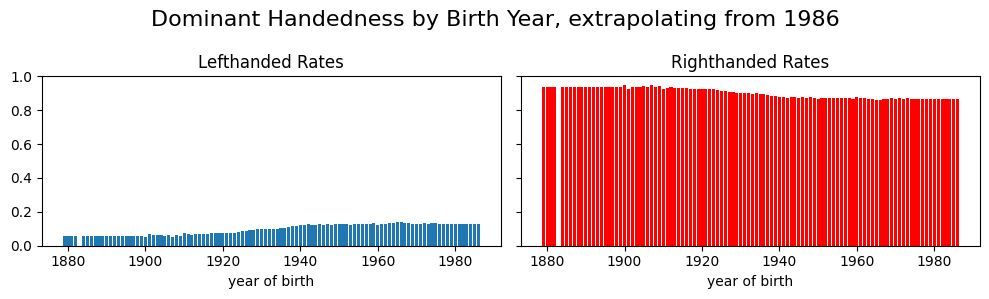

In [15]:
FONTSIZE = 12

# Create explicit axes objects, one for each side
fig, (ax_left, ax_right) = plt.subplots(1, 2, sharey=True, figsize=(10, 3))
# set title
fig.suptitle('Dominant Handedness by Birth Year, extrapolating from 1986', fontsize=16)

# lefthanded top AxesSubplot object
ax_left.set_title('Lefthanded Rates', fontsize=FONTSIZE)
ax_left.set_ylim(0, 1)
ax_left.set_xlabel('year of birth')
ax_left.bar(lefthanded_df['birth_year'], lefthanded_df['lh_proportion'])

# righthanded top AxesSubplot object
ax_right.set_title('Righthanded Rates', fontsize=FONTSIZE)
ax_right.set_xlabel('year of birth')
ax_right.bar(lefthanded_df['birth_year'], lefthanded_df['rh_proportion'], color='red')

plt.tight_layout()

#### Log Scale: Graph Birth Year Distributions of Left/Right Handedness Proportions

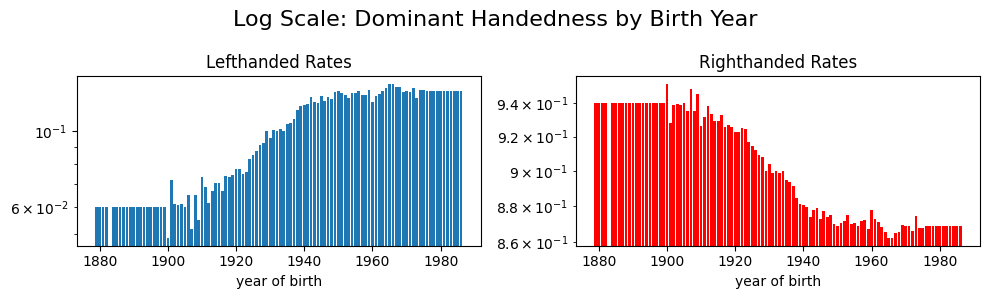

In [16]:
# Create explicit axes objects, one for each side
fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(10, 3))
# set title
fig.suptitle('Log Scale: Dominant Handedness by Birth Year', fontsize=16)

# lefthanded top AxesSubplot object
ax_left.set_title('Lefthanded Rates', fontsize=FONTSIZE)
ax_left.set_yscale('log')
ax_left.set_xlabel('year of birth')
ax_left.bar(lefthanded_df['birth_year'], lefthanded_df['lh_proportion'])

# righthanded top AxesSubplot object
ax_right.set_title('Righthanded Rates', fontsize=FONTSIZE)
ax_right.set_yscale('log')
ax_right.set_xlabel('year of birth')
ax_right.bar(lefthanded_df['birth_year'], lefthanded_df['rh_proportion'], color='red')

plt.tight_layout()

#### Log Scale: Log Scale: Graph Age Distributions of Left/Right Handedness Proportions

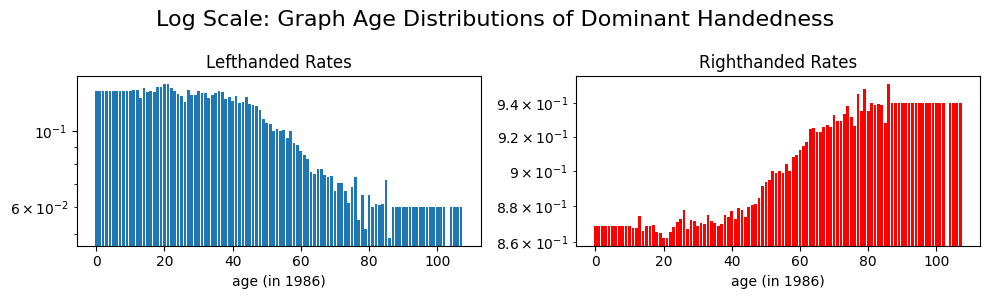

In [17]:
# Create explicit axes objects, one for each side
fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(10, 3))
# set title
fig.suptitle('Log Scale: Graph Age Distributions of Dominant Handedness', fontsize=16)

# lefthanded top AxesSubplot object
ax_left.set_title('Lefthanded Rates', fontsize=FONTSIZE)
ax_left.set_yscale('log')
ax_left.set_xlabel('age (in 1986)')
ax_left.bar(lefthanded_df.index, lefthanded_df['lh_proportion'])

# righthanded top AxesSubplot object
ax_right.set_title('Righthanded Rates', fontsize=FONTSIZE)
ax_right.set_yscale('log')
ax_right.set_xlabel('age (in 1986)')

ax_right.bar(lefthanded_df.index, lefthanded_df['rh_proportion'], color='red')

plt.tight_layout()

### Interpretation: What is the proportion of lefthanded people that were born in 1922?

The probability of lefthandedness given that they were born in 1922 is .075.

This quantity is **P(Person Is Left-Handed| A = 64)**.

### Observations

1. In the above graphs we graphed the top portion with a normal linear scale, and the bottom portion with the log scale. 
2. Notice that the top portion looks fairly flat on both of them.
3. On the bottom of the figure we have the same data as we do on the top, it's just that its scaled in a logarithmic fashion and demonstrates, at least visually, that the distribution of people alive is different when conditioned on left-handedness than when conditioned on right-handedness.

_Watch [this](https://www.khanacademy.org/math/algebra-home/alg-exp-and-log/alg-logarithmic-scale/v/logarithmic-scale) to get a little introduction into logarithmic scale if you're curious_.

# Understanding Probability Statements

## P(A)

This is the probability distribution of dying at a certain age (as taken from 1999 CDC data). We estimate it by looking at the sample_proportion.

In [18]:
deaths_df['sample_proportion'].round(6).to_dict()

{0: 0.011684,
 1: 0.000832,
 2: 0.000575,
 3: 0.000437,
 4: 0.00035,
 5: 0.000319,
 6: 0.000291,
 7: 0.000286,
 8: 0.000289,
 9: 0.000268,
 10: 0.000287,
 11: 0.000297,
 12: 0.0003,
 13: 0.000354,
 14: 0.000485,
 15: 0.000631,
 16: 0.000985,
 17: 0.001215,
 18: 0.001424,
 19: 0.001509,
 20: 0.001464,
 21: 0.00148,
 22: 0.001411,
 23: 0.001375,
 24: 0.001329,
 25: 0.001312,
 26: 0.001371,
 27: 0.001484,
 28: 0.001573,
 29: 0.001664,
 30: 0.001675,
 31: 0.00175,
 32: 0.001923,
 33: 0.002076,
 34: 0.002346,
 35: 0.002624,
 36: 0.002788,
 37: 0.003056,
 38: 0.003363,
 39: 0.003561,
 40: 0.003779,
 41: 0.004102,
 42: 0.00438,
 43: 0.004689,
 44: 0.004987,
 45: 0.005189,
 46: 0.005481,
 47: 0.005667,
 48: 0.005871,
 49: 0.006281,
 50: 0.006538,
 51: 0.007055,
 52: 0.007815,
 53: 0.006774,
 54: 0.007305,
 55: 0.008009,
 56: 0.008923,
 57: 0.008633,
 58: 0.00892,
 59: 0.00938,
 60: 0.009837,
 61: 0.010492,
 62: 0.010974,
 63: 0.011801,
 64: 0.012978,
 65: 0.013359,
 66: 0.014318,
 67: 0.015317

## P(LH | A)

This is the probability of being lefthanded given being a certain age. We estimate this with the 1986 survey data. Take a look at this, for each age, providing an estimate for the probability of being left-handed.

In [19]:
lefthanded_df['lh_proportion'].round(6).to_dict()

{0: 0.130906,
 1: 0.130906,
 2: 0.130906,
 3: 0.130906,
 4: 0.130906,
 5: 0.130906,
 6: 0.130906,
 7: 0.130906,
 8: 0.130906,
 9: 0.130906,
 10: 0.130906,
 11: 0.132318,
 12: 0.131788,
 13: 0.125351,
 14: 0.133646,
 15: 0.13082,
 16: 0.131032,
 17: 0.130235,
 18: 0.134533,
 19: 0.134761,
 20: 0.137587,
 21: 0.137552,
 22: 0.134016,
 23: 0.131493,
 24: 0.128687,
 25: 0.127171,
 26: 0.122103,
 27: 0.132577,
 28: 0.12745,
 29: 0.128027,
 30: 0.13086,
 31: 0.129456,
 32: 0.129698,
 33: 0.125059,
 34: 0.128117,
 35: 0.129252,
 36: 0.130897,
 37: 0.130054,
 38: 0.124633,
 39: 0.125846,
 40: 0.122662,
 41: 0.127087,
 42: 0.121194,
 43: 0.12215,
 44: 0.125794,
 45: 0.120391,
 46: 0.119464,
 47: 0.118764,
 48: 0.115458,
 49: 0.108677,
 50: 0.106079,
 51: 0.10493,
 52: 0.100238,
 53: 0.101379,
 54: 0.100192,
 55: 0.100952,
 56: 0.095769,
 57: 0.099935,
 58: 0.092146,
 59: 0.090969,
 60: 0.08766,
 61: 0.085507,
 62: 0.08322,
 63: 0.075807,
 64: 0.075174,
 65: 0.077481,
 66: 0.077429,
 67: 0.07433

## P(LH)

### Definition

This is the probability of being left-handed, and can be estimated by computing the following sum:

### Computation

_P(lefthanded and dying at 0 years old) + P(lefthanded and dying at 1 years old) + P(lefthanded and dying at 2 years old) + . . . . + P(lefthanded and dying at 107 years old)_

... Actually for each of these, the P(lefthanded and dying at n years old) = P(lefthanded | dying at n years old) * P(dying at n years old)

But we know how to do this (see above), each summand can be expressed as P(LH | A) * P(A) for each A ranging from 0 to 107, inclusive.

In [20]:
# create DataFrame
death_handedness_df = lefthanded_df.merge(deaths_df[['birth_year', 'sample_proportion']], on='birth_year')
death_handedness_df.index.name = 'Age'
death_handedness_df.sample(20, random_state=42).sort_index().round(6)

,lh_proportion,rh_proportion,birth_year,sample_proportion
Age,,,,
0,0.130906,0.869094,1986,0.000354
4,0.130906,0.869094,1982,0.001215
10,0.130906,0.869094,1976,0.001375
11,0.132318,0.867682,1975,0.001329
18,0.134533,0.865467,1968,0.001750
30,0.130860,0.869140,1956,0.004689
42,0.121194,0.878806,1944,0.008009
45,0.120391,0.879609,1941,0.008920
47,0.118764,0.881236,1939,0.009837


In [21]:
death_handedness_df = death_handedness_df.rename(columns={
    'lh_proportion': 'P(LH | death at A)',
    'rh_proportion': 'P(RH | death at A)',
    'sample_proportion': 'P(death at A)'})
death_handedness_df

,P(LH | death at A),P(RH | death at A),birth_year,P(death at A)
Age,,,,
0,0.130906,0.869094,1986,3.542387e-04
1,0.130906,0.869094,1985,4.847257e-04
2,0.130906,0.869094,1984,6.311053e-04
3,0.130906,0.869094,1983,9.845076e-04
4,0.130906,0.869094,1982,1.214533e-03
...,...,...,...,...
102,0.060072,0.939928,1884,1.254683e-06
103,0.060072,0.939928,1882,1.254683e-06
104,0.060072,0.939928,1881,4.182275e-07


In [22]:
death_handedness_df['P(LH and death at A)'] = death_handedness_df['P(LH | death at A)'] * death_handedness_df['P(death at A)']
death_handedness_df

,P(LH | death at A),P(RH | death at A),birth_year,P(death at A),P(LH and death at A)
Age,,,,,
0,0.130906,0.869094,1986,3.542387e-04,4.637202e-05
1,0.130906,0.869094,1985,4.847257e-04,6.345357e-05
2,0.130906,0.869094,1984,6.311053e-04,8.261557e-05
3,0.130906,0.869094,1983,9.845076e-04,1.288781e-04
4,0.130906,0.869094,1982,1.214533e-03,1.589898e-04
...,...,...,...,...,...
102,0.060072,0.939928,1884,1.254683e-06,7.537077e-08
103,0.060072,0.939928,1882,1.254683e-06,7.537077e-08
104,0.060072,0.939928,1881,4.182275e-07,2.512359e-08


In [23]:
probability_left_handed = death_handedness_df['P(LH and death at A)'].sum()
probability_right_handed = 1 - probability_left_handed
print(f"The probability of being left-handed can be estimated with {probability_left_handed}")
print(f"The probability of being right-handed can be estimated with {probability_right_handed}")

The probability of being left-handed can be estimated with 0.08558112325485144
The probability of being right-handed can be estimated with 0.9144188767451485


## P(A | LH)

### Definition

We haven't seen this one, this is the distribution of the age of dying conditioned on being left-handed.

This is the one that relies on [Bayes Rule](https://en.wikipedia.org/wiki/Bayes%27_theorem#Statement_of_theorem) and the only probability that matters in determining the probability of dying given left-handedness.

### Computation (Bayes Rule)

In [24]:
death_handedness_df['P(A | LH)'] = death_handedness_df['P(LH and death at A)'] / probability_left_handed

## P(A | RH)

### Definition

This is NOT 1 - P(A | LH), it is just the probability distribution of ages of death given right-handedness.

### Computation (Bayes Rule)

In [25]:
death_handedness_df['P(A | RH)'] = (
    death_handedness_df['P(RH | death at A)'] * death_handedness_df['P(death at A)']/ probability_right_handed
)

# Comparing P(A | LH) and P(A | RH)

We notice similar distributions of ages of death for left-handed and right-handed dominant folks.

## Comparing Distributions

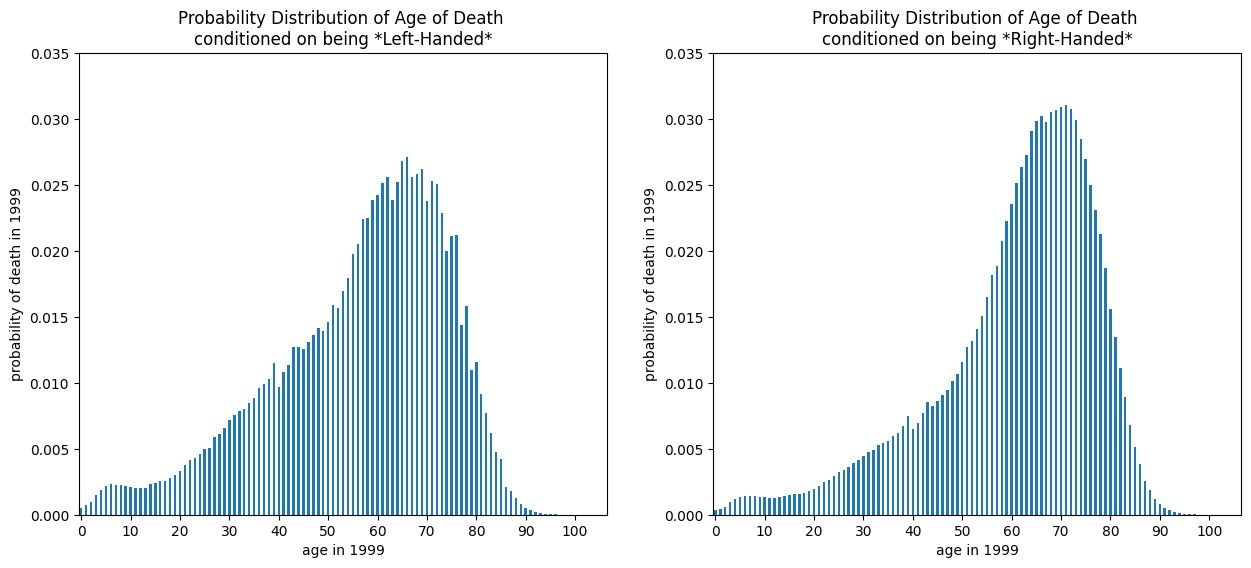

In [26]:
fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(15, 6))

death_handedness_df['P(A | LH)'].plot.bar(rot=0, ax=ax_left, 
                                       title='Probability Distribution of Age of Death \n'
                                             'conditioned on being *Left-Handed*')
death_handedness_df['P(A | RH)'].plot.bar(rot=0, ax=ax_right, 
                                       title='Probability Distribution of Age of Death \n'
                                             'conditioned on being *Right-Handed*')
for ax in [ax_left, ax_right]:
    ax.set_xticks(range(0, 110, 10))
    ax.set_ylabel('probability of death in 1999')
    ax.set_xlabel('age in 1999')
    ax.set_ylim(0, .035)

## Comparing Means

In [27]:
life_expectancies = (death_handedness_df[['P(A | LH)', 'P(A | RH)']].values.T * death_handedness_df.index.values).sum(1).round(2)
diff = life_expectancies[1] - life_expectancies[0]
print(f"The difference in mean life_expectancies is {diff:.1f}.")
print(f"The life expectancy for for left-handed and right-handed people is {life_expectancies}, respectively.")

The difference in mean life_expectancies is 3.5.
The life expectancy for for left-handed and right-handed people is [56.33 59.86], respectively.


# Conclusion

## Review

### Bayes Rule

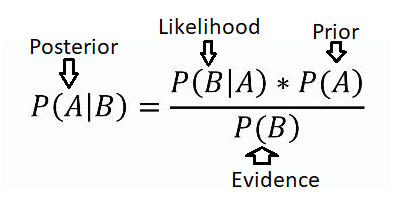

### Prior

We used the distribution of ages of death to compute an empirical probability distribution of the age of death in 1999, or equivalently, the probability distribution of year of birth given death in 1999. This is considered the **prior**. Without knowing anything, we have a prior distribution on the age of death.

### Likelihood

We used the survey results from 1986 to compute a mapping of year of birth to an estimated probability for being lefthanded. This is considered the **likelihood**. The likelihood of someone being lefthanded increases as their year of birth increases.

### Evidence

1. We created a dataframe by merging the dataframes on the year of birth. We called this merged dataframe `death_handedness_df`.
2. By doing operations on the columns of `death_handedness_df`, we were able to estimate, for each number `n`, the probability that someone will die at age `n` in 1999 and that they are lefthanded. We did this purely using the definition of conditional probability. 
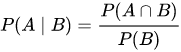
3. Then we sum those up for all `n` in order to find the probability of being lefthanded, otherwise known as the **evidence**.

### Posterior

Finally, we were able to determine our **posterior**, and did it with a one-line column operation on the `death_handedness_df`. This operation gave us, for each `n`, the probability of dying in 1999 at age `n` given we are left-handed. We just needed the probability of death at age `n` in 1999 (prior), the probability of being left-handed (evidence), and the probability of being left-handed given that you're going to be `n` years old in 1999.

> Remember Tom the introverted college student . . . it was the same idea
 - We had some sense that the probability of being a math PhD student was _rare_. Our **prior**.
 - We had some sense that math PhD students were more likely to be shy and introverted than a business undergrad. This was our **likelihood**.
 - We made some assumptions about being shy on the whole (like, 50% of math PhDs and 5% of business school students). This was our **evidence**.
 - And in that lesson, combined these notions in the same way, and ultimately it led us to say that the probability of a math undergrad given being shy and introverted was still less than the proability of being a business school undergrad. This was our **posterior**. 
 
I hope this makes sense. It's our prior belief times the likelihood divided by the evidence that gives us our posterior.  

## On left-handed life expectancies.

Most would agree that the explanation around life-expectancies being different among left and right-handed people has gone away due to the it being more acceptable to be right-handed, and that people used to be forced to be right handed in the early 20th century. This Bayesian analysis was able to show us that the difference in the means of the life-expectancies was not as large as one might assume looking at the original side-by-side graphs comparing the likelihoods of left-handedness by age and right-handedness by age.